In [1]:
from pylab import *
from scipy.integrate import *

In [2]:
def carga(x,x_q,q):
    r_rp = ( (x[0]-x_q[0])**2 + (x[1]-x_q[1])**2 )**1.5
    Ex = (x[0]-x_q[0])/r_rp
    Ey = (x[1]-x_q[1])/r_rp
    return array([q*Ex,q*Ey])

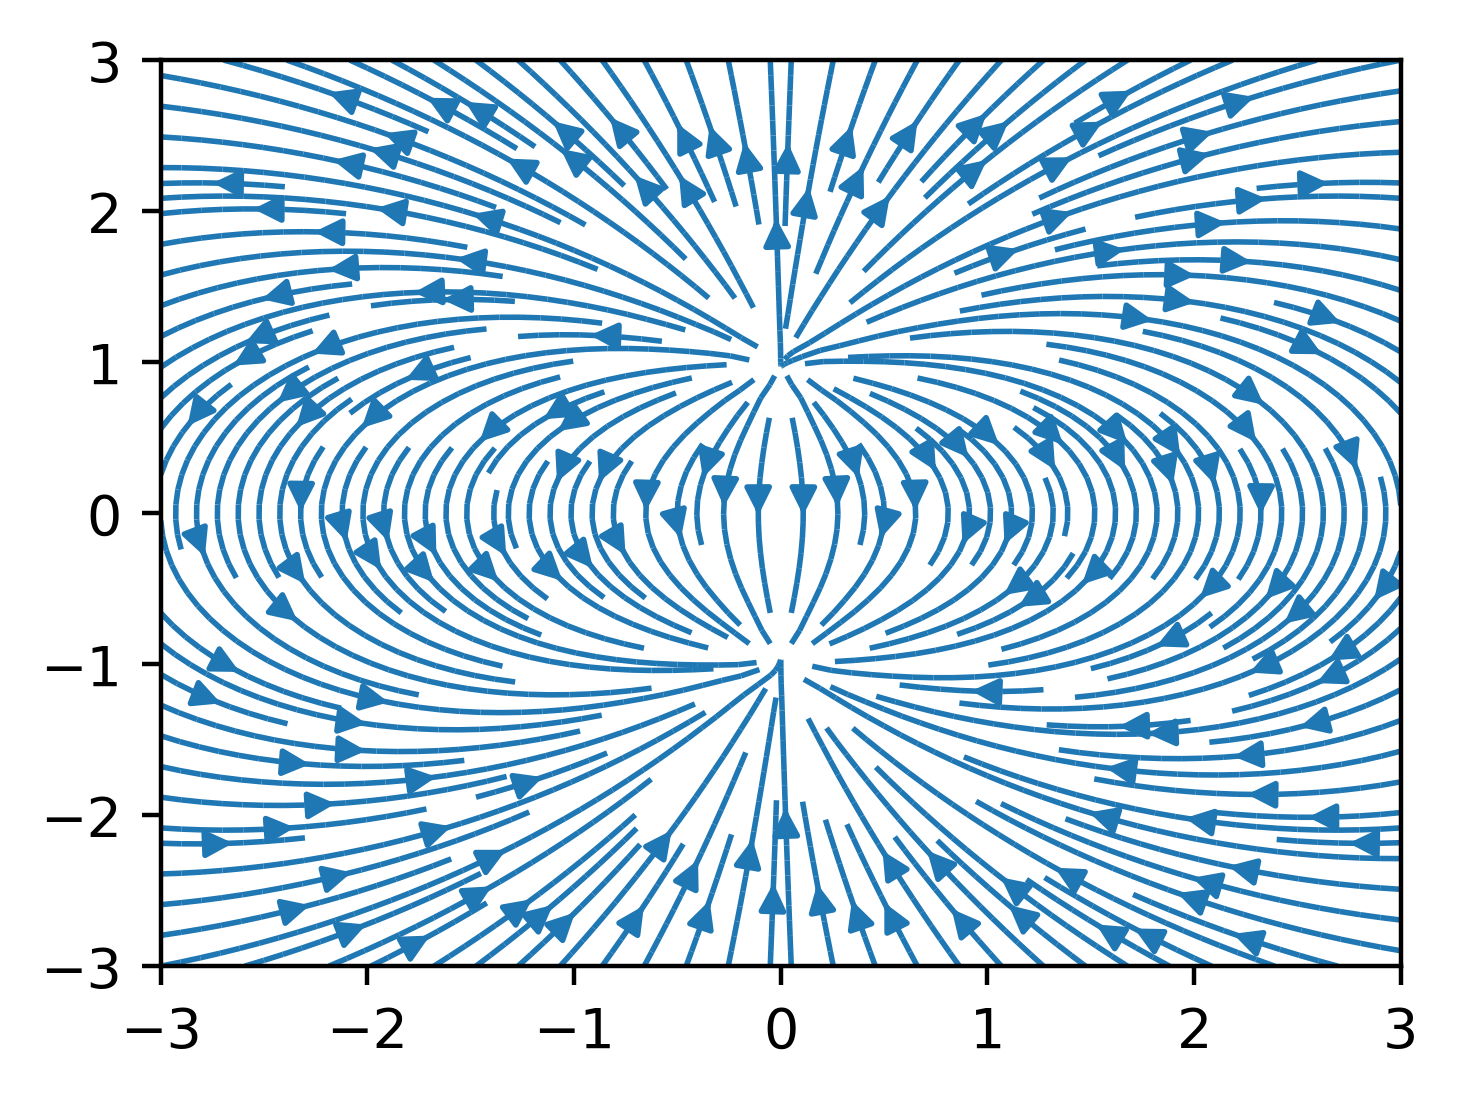

In [3]:
x,y = linspace(-3,3),linspace(-3,3)
xv,yv = meshgrid(x,y)
E = carga([xv,yv],[0,-1],-1) + carga([xv,yv],[0,1],1)
figure(dpi=200,figsize=(4,3))
streamplot(xv,yv,E[0],E[1],density=2,linewidth=1)
show()

In [4]:
def dipolo(t,x,x_q=[[0,-1],[0,1]],qs=[-1,1]):
    E = carga(x,x_q[0],qs[0]) + carga(x,x_q[1],qs[1])
    return E

In [5]:
norm(dipolo(0,[0,1.01]))

9999.752481374206

In [37]:
def condicion(t,x):
    return norm(dipolo(0,x)) < 1e4
condicion.terminal = True

In [38]:
p_ini = [0.01,1.0]
t = (0.0,10.0)
sol_ODEivp = solve_ivp(dipolo,t,p_ini,events=condicion,dense_output=True)
sol_ODEivp

  message: 'A termination event occurred.'
     nfev: 350
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7ff9d8560490>
   status: 1
  success: True
        t: array([0.00000000e+00, 1.18814868e-06, 2.27136696e-06, 7.98800643e-06,
       1.55265207e-05, 6.66286290e-05, 1.15760303e-04, 3.73202440e-04,
       7.09936739e-04, 3.14653042e-03, 5.38265075e-03, 1.72710686e-02,
       3.27186553e-02, 1.09204926e-01, 2.03913025e-01, 5.38385172e-01,
       1.08762998e+00, 2.22866031e+00, 4.02059579e+00, 6.20268400e+00,
       7.01141958e+00, 7.25122518e+00, 7.30034368e+00, 7.32065077e+00,
       7.32703952e+00, 7.33342828e+00, 7.33638791e+00, 7.33718297e+00,
       7.33797802e+00, 7.33845530e+00, 7.33859986e+00, 7.33874442e+00,
       7.33881061e+00, 7.33883074e+00, 7.33885087e+00, 7.33886218e+00,
       7.33886408e+00, 7.33886489e+00, 7.33886523e+00])
 t_events: [array([7.33886523])]
        y: array([[ 0.01      ,  0.0162397 ,  0.01960236,  0.02899168,

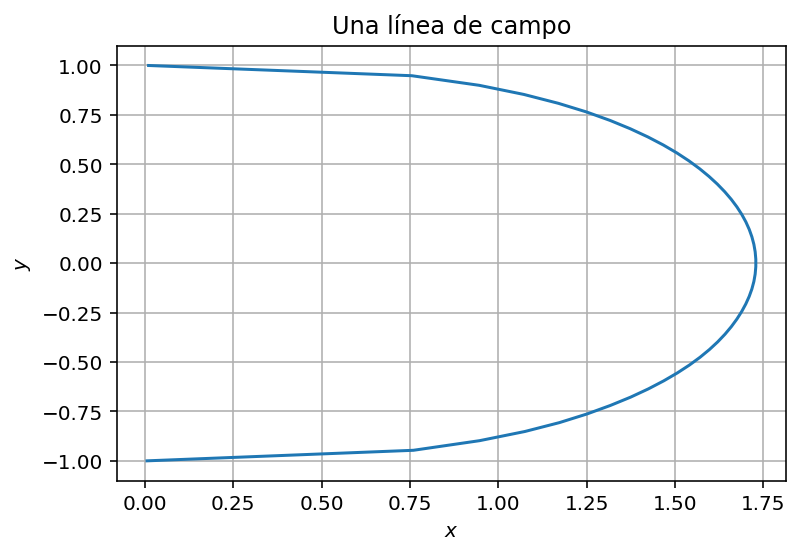

In [39]:
t_cont = linspace(0,sol_ODEivp.t[-1])
plot(sol_ODEivp.sol(t_cont)[0,:],sol_ODEivp.sol(t_cont)[1,:])
grid(),title("Una línea de campo"),xlabel(r"$x$"),ylabel(r"$y$")
show()

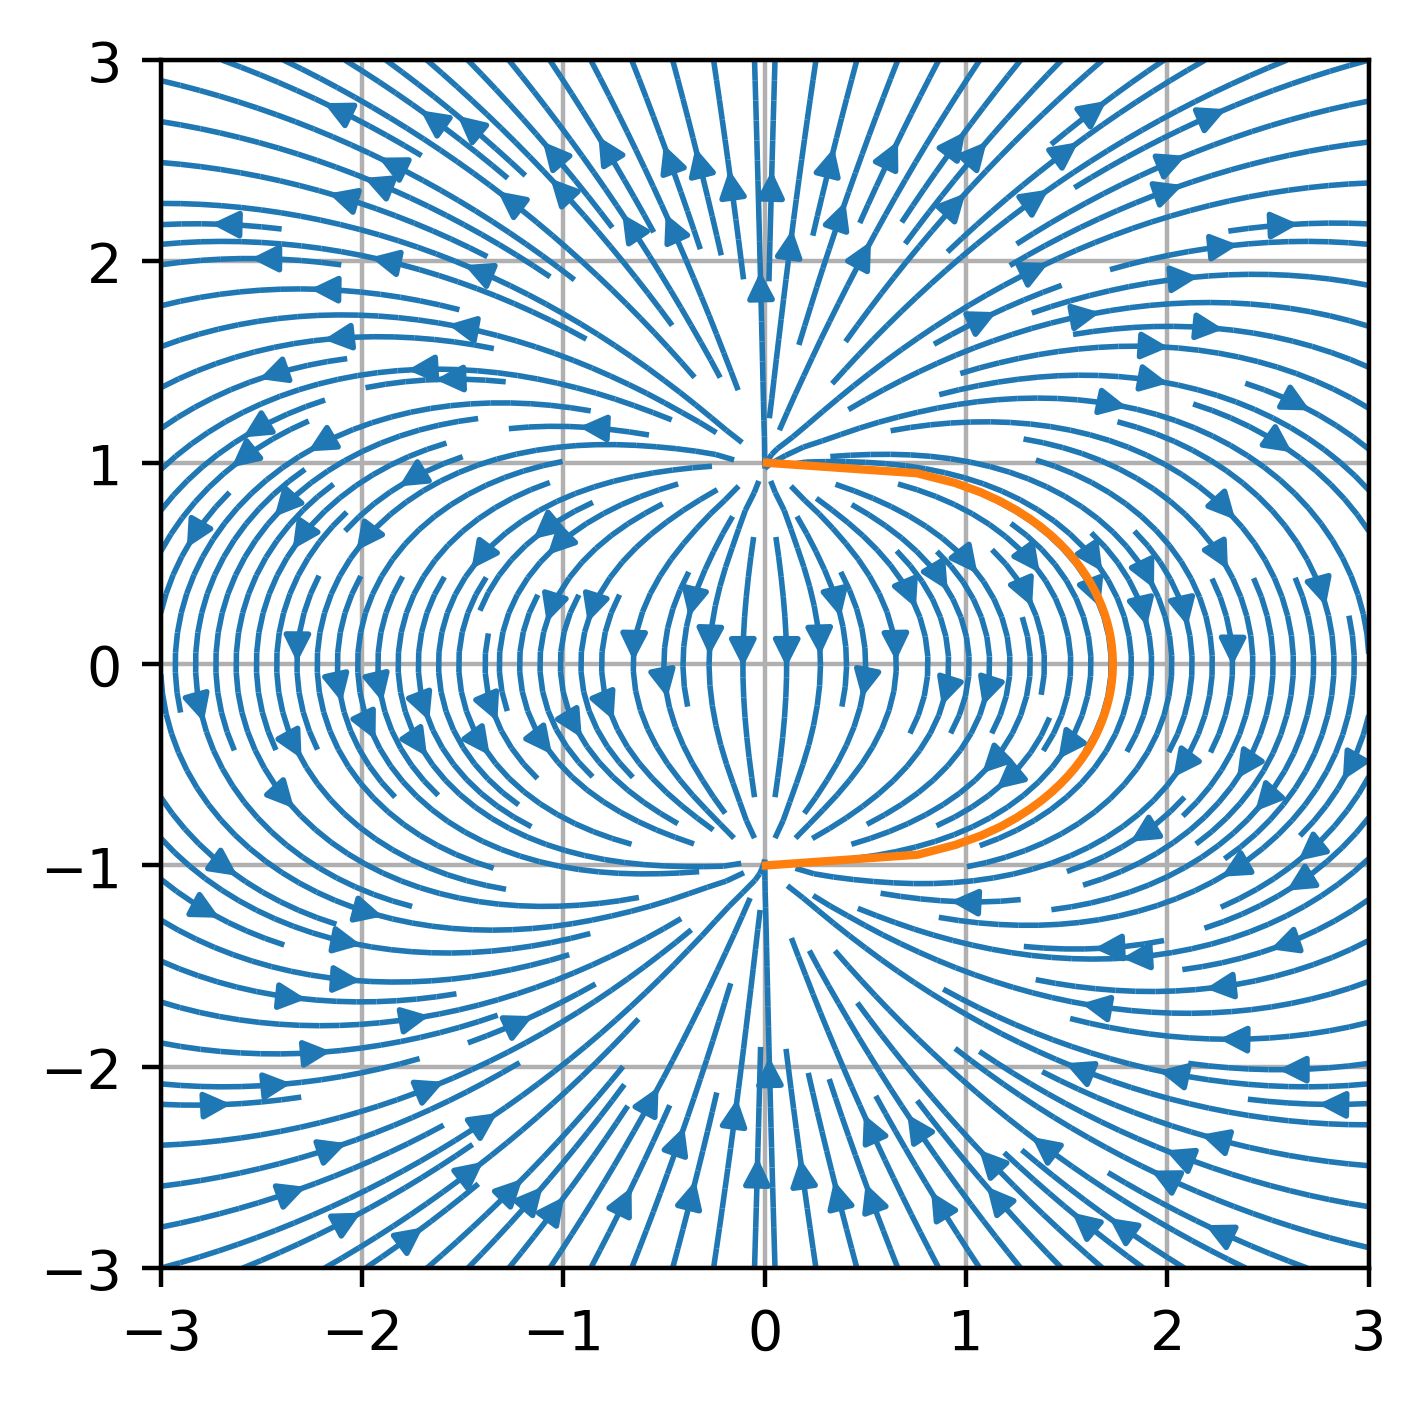

In [40]:
figure(dpi=200)
streamplot(xv,yv,E[0],E[1],density=2,linewidth=1)
plot(sol_ODEivp.sol(t_cont)[0,:],sol_ODEivp.sol(t_cont)[1,:])
grid(),gca().set_aspect("equal")
show()

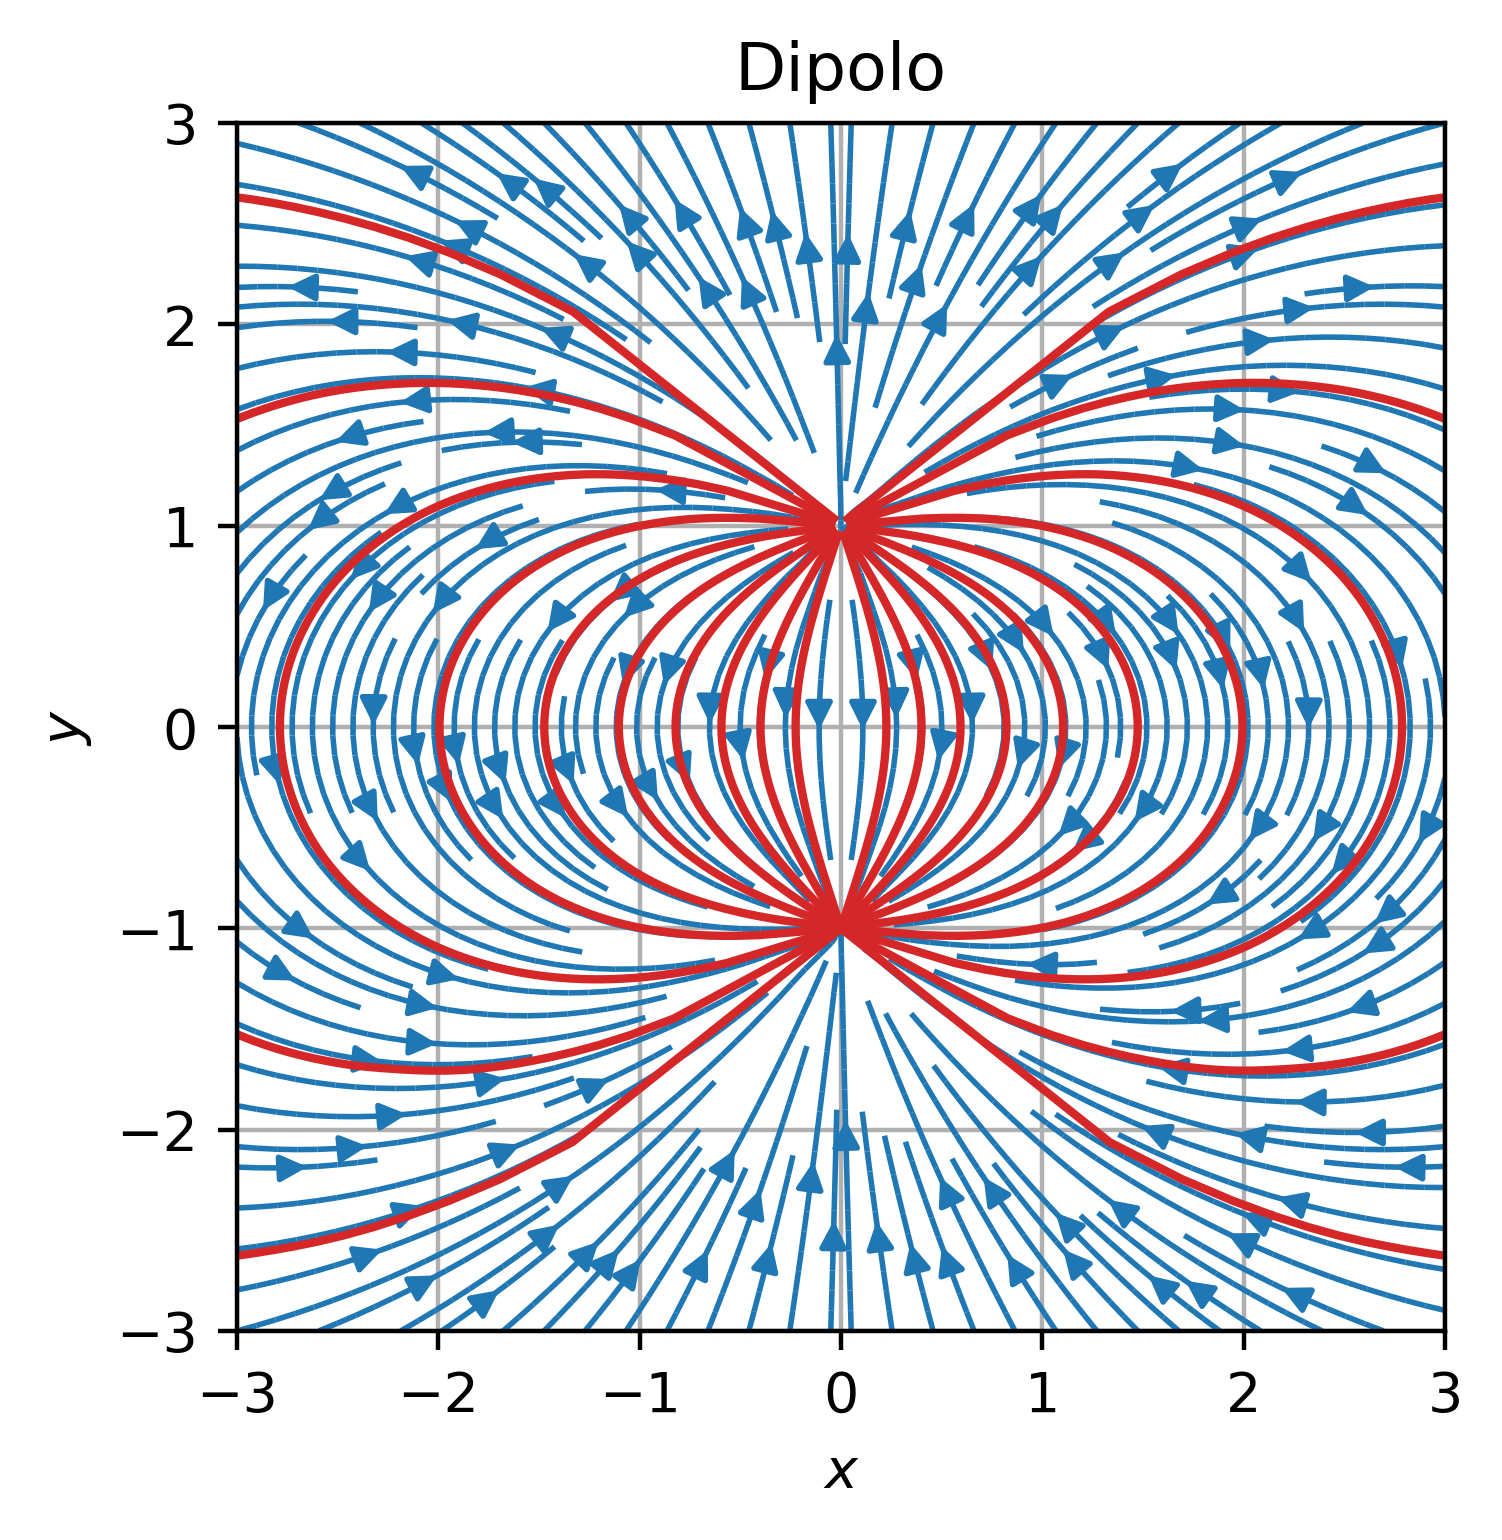

In [49]:
figure(dpi=200)
angulos = linspace(-2*pi/5,pi/4,10)
angulos = concatenate((23*pi/20+angulos,angulos))
#angulos = linspace(0,2*pi)
for angulo in angulos:
    p_ini = [0.05*cos(angulo),1+0.05*sin(angulo)]
    t = (0,10e6)
    sol_ODEivp = solve_ivp(dipolo,t,p_ini,events=condicion,dense_output=True)
    t_cont = linspace(0,sol_ODEivp.t[-1],500)
    plot(sol_ODEivp.sol(t_cont)[0,:],sol_ODEivp.sol(t_cont)[1,:],color="tab:red")
streamplot(xv,yv,E[0],E[1],density=2,linewidth=1)
grid(),title("Dipolo"),gca().set_aspect("equal"),xlabel(r"$x$"),ylabel(r"$y$")
xlim([-3,3]),ylim([-3,3])
show()